In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [323]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("sulsel.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  361 non-null    datetime64[ns]
 1   Tn       351 non-null    float64       
 2   Tx       354 non-null    float64       
 3   Tavg     356 non-null    float64       
 4   RH_avg   356 non-null    float64       
 5   RR       350 non-null    float64       
 6   ss       357 non-null    float64       
 7   ff_x     357 non-null    float64       
 8   ddd_x    357 non-null    float64       
 9   ff_avg   357 non-null    float64       
 10  ddd_car  357 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.1+ KB


<ipython-input-323-40d0c26c67a0>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [324]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,24.0,31.0,4.8,27.2
1,2023-02-01,25.0,31.5,0.0,27.7
2,2023-03-01,23.4,28.7,51.8,24.7
3,2023-04-01,23.3,26.6,74.2,23.9
4,2023-05-01,22.8,25.9,136.0,24.2
...,...,...,...,...,...
356,2023-12-12,25.4,30.2,5.4,26.5
357,2023-12-13,24.2,31.5,38.4,27.7
358,2023-12-14,25.2,32.5,0.4,28.9
359,2023-12-15,25.5,32.6,8888.0,28.5


In [325]:
# cek duplikat
df1.duplicated().sum()

11

In [326]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [327]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [328]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,24.0,31.0,4.8,27.2
1,31,31,2023-01-02,23.0,31.8,0.0,26.0
2,59,60,2023-01-03,22.9,28.7,25.4,24.5
3,90,92,2023-01-04,NaN,30.8,14.2,25.9
4,120,123,2023-01-05,24.2,33.2,0.2,28.1
...,...,...,...,...,...,...,...
345,345,356,2023-12-12,25.4,30.2,5.4,26.5
346,346,357,2023-12-13,24.2,31.5,38.4,27.7
347,347,358,2023-12-14,25.2,32.5,0.4,28.9
348,348,359,2023-12-15,25.5,32.6,0.0,28.5


In [329]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          8
Tx          6
RR         10
Tavg        5
dtype: int64

In [330]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       4
dtype: int64

In [331]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

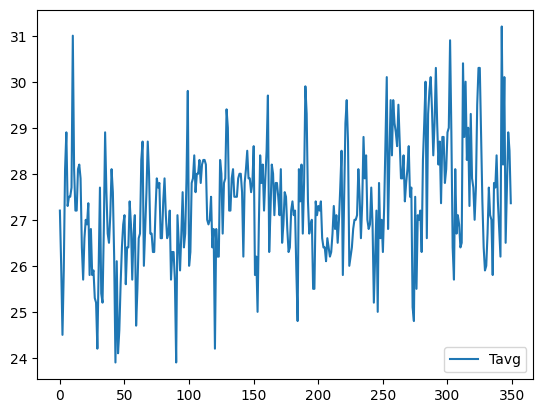

In [332]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

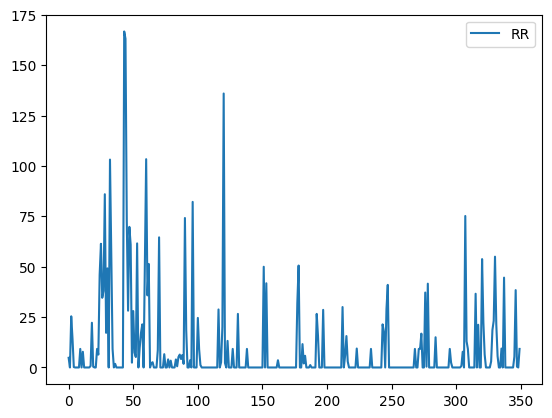

In [333]:
#plotting tavg
df1[['RR']].plot()

In [334]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,24.000000,31.000000,4.800000,27.200000,31.800000,26.000000,0.000000
1,31,31,2023-01-02,23.000000,31.800000,0.000000,26.000000,28.700000,24.500000,25.400000
2,59,60,2023-01-03,22.900000,28.700000,25.400000,24.500000,30.800000,25.900000,14.200000
3,90,92,2023-01-04,23.459357,30.800000,14.200000,25.900000,33.200000,28.100000,0.200000
4,120,123,2023-01-05,24.200000,33.200000,0.200000,28.100000,33.800000,28.900000,0.000000
...,...,...,...,...,...,...,...,...,...,...
345,345,356,2023-12-12,25.400000,30.200000,5.400000,26.500000,31.500000,27.700000,38.400000
346,346,357,2023-12-13,24.200000,31.500000,38.400000,27.700000,32.500000,28.900000,0.400000
347,347,358,2023-12-14,25.200000,32.500000,0.400000,28.900000,32.600000,28.500000,0.000000
348,348,359,2023-12-15,25.500000,32.600000,0.000000,28.500000,32.844767,27.360116,9.216471


In [335]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,4.800000,27.200000,26.000000,0.000000
1,0.000000,26.000000,24.500000,25.400000
2,25.400000,24.500000,25.900000,14.200000
3,14.200000,25.900000,28.100000,0.200000
4,0.200000,28.100000,28.900000,0.000000
...,...,...,...,...
345,5.400000,26.500000,27.700000,38.400000
346,38.400000,27.700000,28.900000,0.400000
347,0.400000,28.900000,28.500000,0.000000
348,0.000000,28.500000,27.360116,9.216471


In [336]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,4.8,27.2,26.000000,0.000000
1,0.0,26.0,24.500000,25.400000
2,25.4,24.5,25.900000,14.200000
3,14.2,25.9,28.100000,0.200000
4,0.2,28.1,28.900000,0.000000
...,...,...,...,...
344,0.0,30.1,26.500000,5.400000
345,5.4,26.5,27.700000,38.400000
346,38.4,27.7,28.900000,0.400000
347,0.4,28.9,28.500000,0.000000


In [337]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [338]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,4.8,27.2,26.000000,0.000000,0
1,0.0,26.0,24.500000,25.400000,1
2,25.4,24.5,25.900000,14.200000,2
3,14.2,25.9,28.100000,0.200000,3
4,0.2,28.1,28.900000,0.000000,4
...,...,...,...,...,...
344,0.0,30.1,26.500000,5.400000,344
345,5.4,26.5,27.700000,38.400000,345
346,38.4,27.7,28.900000,0.400000,346
347,0.4,28.9,28.500000,0.000000,347


In [339]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [340]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [341]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [342]:
X_test

,Indeks,Tavg
279,279,27.2
280,280,26.3
281,281,28.3
282,282,29.1
283,283,30.0
...,...,...
344,344,30.1
345,345,26.5
346,346,27.7
347,347,28.9


In [343]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.40361757, 26.99050792, 27.91366417, 28.2838828 , 28.70017957,
       27.13511657, 28.38081975, 28.61280399, 28.75263195, 28.43167857,
       27.97249079, 28.29663129, 28.85116246, 28.29981841, 27.88670877,
       28.118693  , 27.50289283, 28.16795826, 28.16955182, 27.71036404,
       27.850192  , 28.22041064, 28.26808233, 29.14516044, 28.22519132,
       27.07483153, 26.75387815, 27.86134693, 27.21784661, 27.40375271,
       27.31319   , 27.08439289, 27.13206459, 28.93070538, 28.1950488 ,
       28.74957997, 27.96784525, 28.29198575, 27.51025103, 28.43340727,
       27.78990696, 27.69934425, 27.37839087, 27.70253137, 28.53353135,
       28.90374998, 28.90534355, 28.21576509, 27.57226478, 27.11307699,
       26.88427988, 26.93195158, 27.25609208, 27.71846698, 27.44359174,
       27.39910717, 26.84776312, 27.77091936, 27.72643479, 28.05057529,
       27.59138751, 27.31651227, 27.04163702, 29.34713729, 27.96638683,
       28.84346494, 27.18624567, 27.74077684, 28.29530801, 28.11

In [344]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.0529446700127745 1.7047256738420657


In [345]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
279,279,27.2
280,280,26.3
281,281,28.3
282,282,29.1
283,283,30.0
...,...,...
344,344,30.1
345,345,26.5
346,346,27.7
347,347,28.9


In [346]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
279,27.403618
280,26.990508
281,27.913664
282,28.283883
283,28.700180
...,...
344,28.843465
345,27.186246
346,27.740777


In [347]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-347-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.2,NaN
1,26.0,NaN
2,24.5,NaN
3,25.9,NaN
4,28.1,NaN
...,...,...
344,30.1,28.843465
345,26.5,27.186246
346,27.7,27.740777
347,28.9,28.295308


<Axes: >

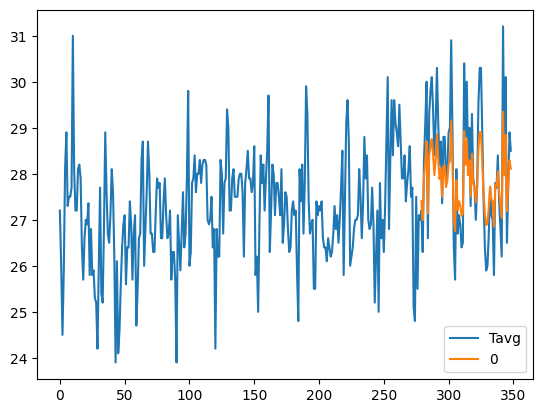

In [348]:
kan.plot()

In [349]:
new_data = [[350, 28.5],[351,28.5],[352,28.5],[353,28.5],[354,28.5],[355,28.5],[356,28.5]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.11577616, 28.11736972, 28.11896328, 28.12055684, 28.1221504 ,
       28.12374397, 28.12533753])

In [350]:
kan.to_json('prediksi sulsel')